In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from datasets import load_dataset, Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import transforms as T
from torchvision.utils import make_grid
from PIL import Image
from itertools import islice
from torch import Tensor


DATASET = "deadprogram/clothes-with-class"
DATA_DIR = "data"

/Users/egecimsir/Coding/cloth-description-model/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def get_batch(
        N: int, 
        size: tuple[int] = (96, 96),
        dataset_name: str = DATASET, 
        split: str = "train"
    ) -> Tensor:
    
    dataset = load_dataset(
        dataset_name,
        split=split,
        streaming=True,
    )
    data = Dataset.from_list(list(islice(dataset, N)))
    transform = T.Compose([
        T.Resize(size=size),
        T.ToTensor(),
    ])
    return torch.concat([transform(img["image"]).unsqueeze(0) for img in data], dim=0)

In [14]:
batch = get_batch(100, size=(400, 400))
batch.shape

torch.Size([100, 3, 400, 400])

(1610, 1610, 3)


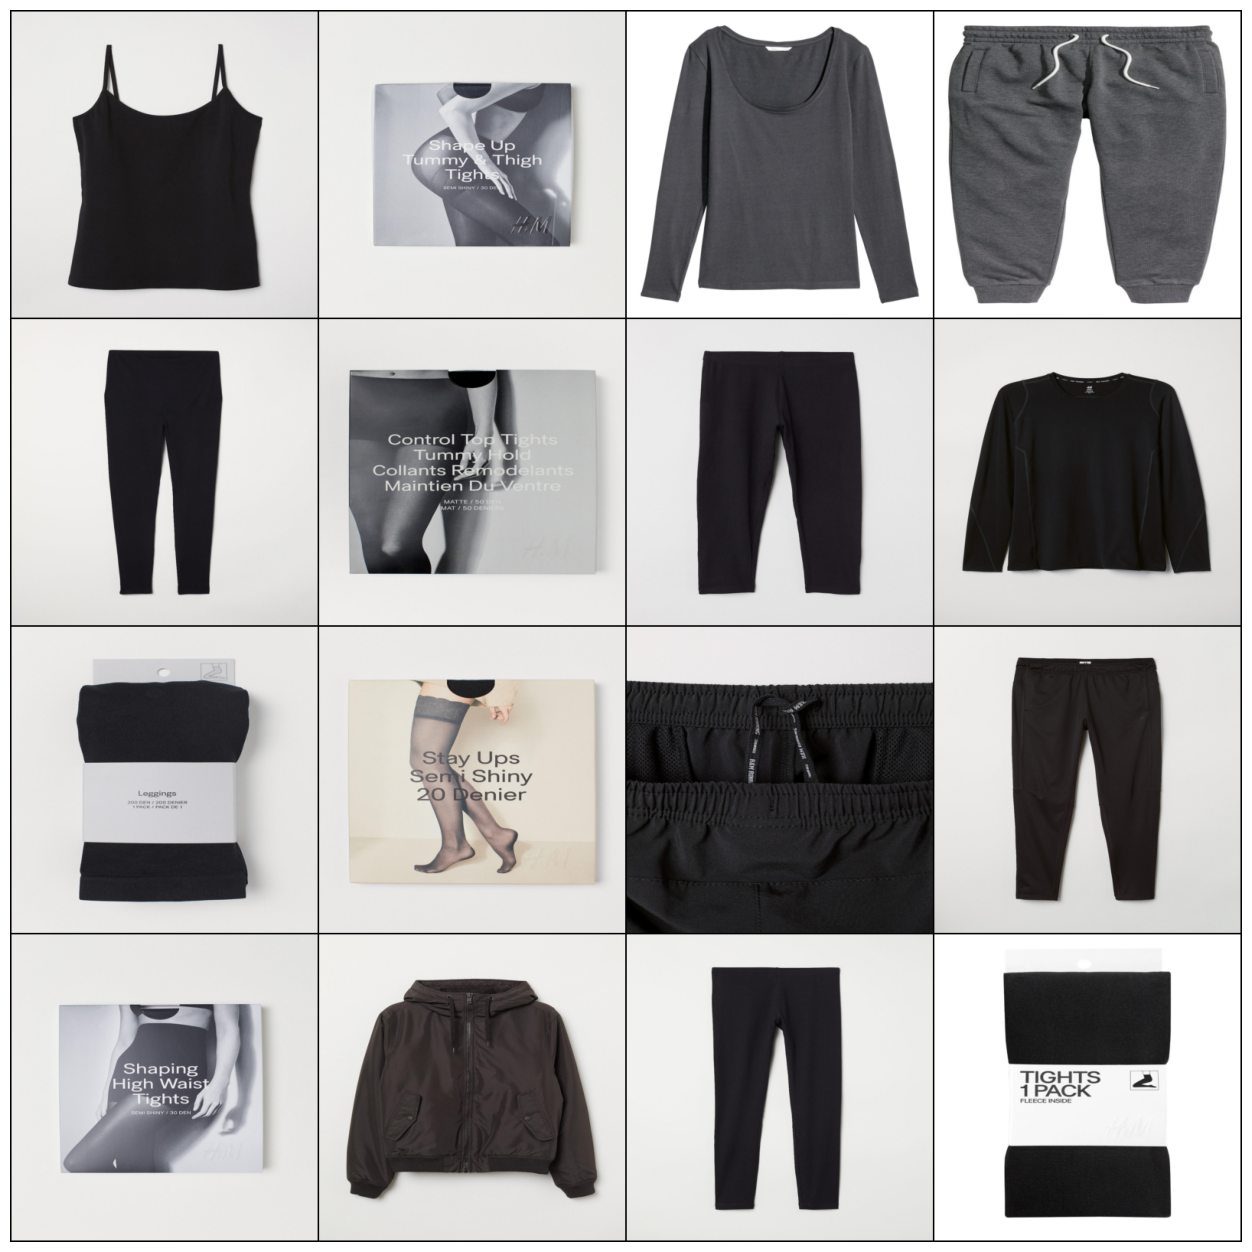

In [15]:
img_grid = make_grid(batch[:16], nrow=4).permute(1, 2, 0).numpy()
print(img_grid.shape)

plt.figure(figsize=(16, 16))
plt.imshow(img_grid)
plt.axis("off")
plt.show()